In [2]:
from python_scripts.diversification import TriggerSimulation
from python_scripts.dynamic_asset_allocation import DAASimulation
from python_scripts.data_and_descriptives import *

from datetime import date
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

#### Import data

[*********************100%%**********************]  5 of 5 completed
c:\Users\germa\Documents\Python\dynamic_asset_allocation\python_scripts\data_and_descriptives.py:101: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='backfill')


using CLOSING PRICES...


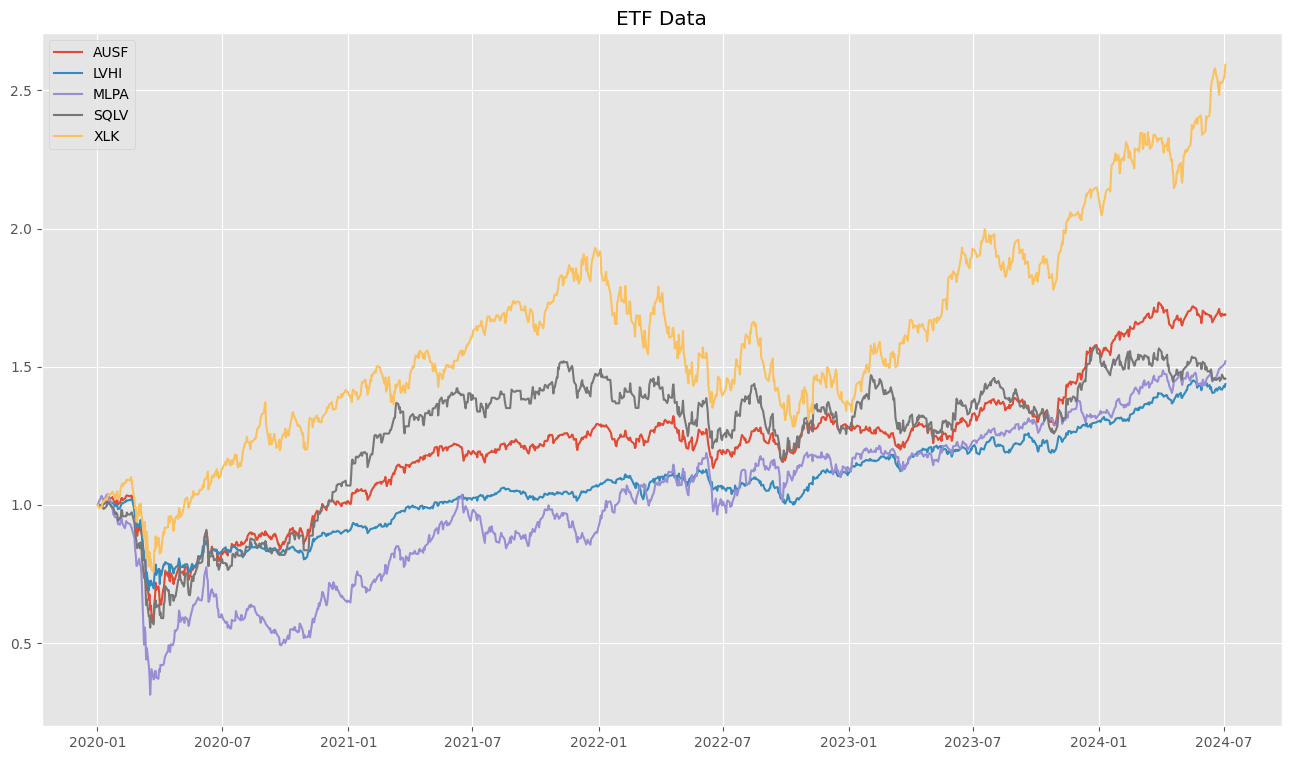

In [3]:
freq = "1d"
tickers = ['AUSF','LVHI', 'SQLV','MLPA','XLK']
start = '2020-01-01' 
end = date.today()
prices = data_yahoo(tickers,freq, start, end, ['Adj Close'], False)
prices = fix_na_data_yahoo(prices)
prices = normalize_data(prices, False, 1, True, True)
returns = prices.pct_change().dropna()

### Backtest of diversification algorithm

##### Try rebalancing with stop loss and take profit

backtesting ew_cap_floor strategy using a thresholds (% return) of [0.1, 0.1]
using cash_bank as safe asset...


c:\Users\germa\Documents\Python\dynamic_asset_allocation\python_scripts\diversification.py:56: RuntimeWarning: invalid value encountered in divide
  return (da/da_rebal - 1 > self.threshold[0]) | (da/da_rebal - 1 < -self.threshold[1])
c:\Users\germa\Documents\Python\dynamic_asset_allocation\python_scripts\diversification.py:56: RuntimeWarning: divide by zero encountered in divide
  return (da/da_rebal - 1 > self.threshold[0]) | (da/da_rebal - 1 < -self.threshold[1])


using RETURNS...
--- 0.7506082057952881 seconds ---


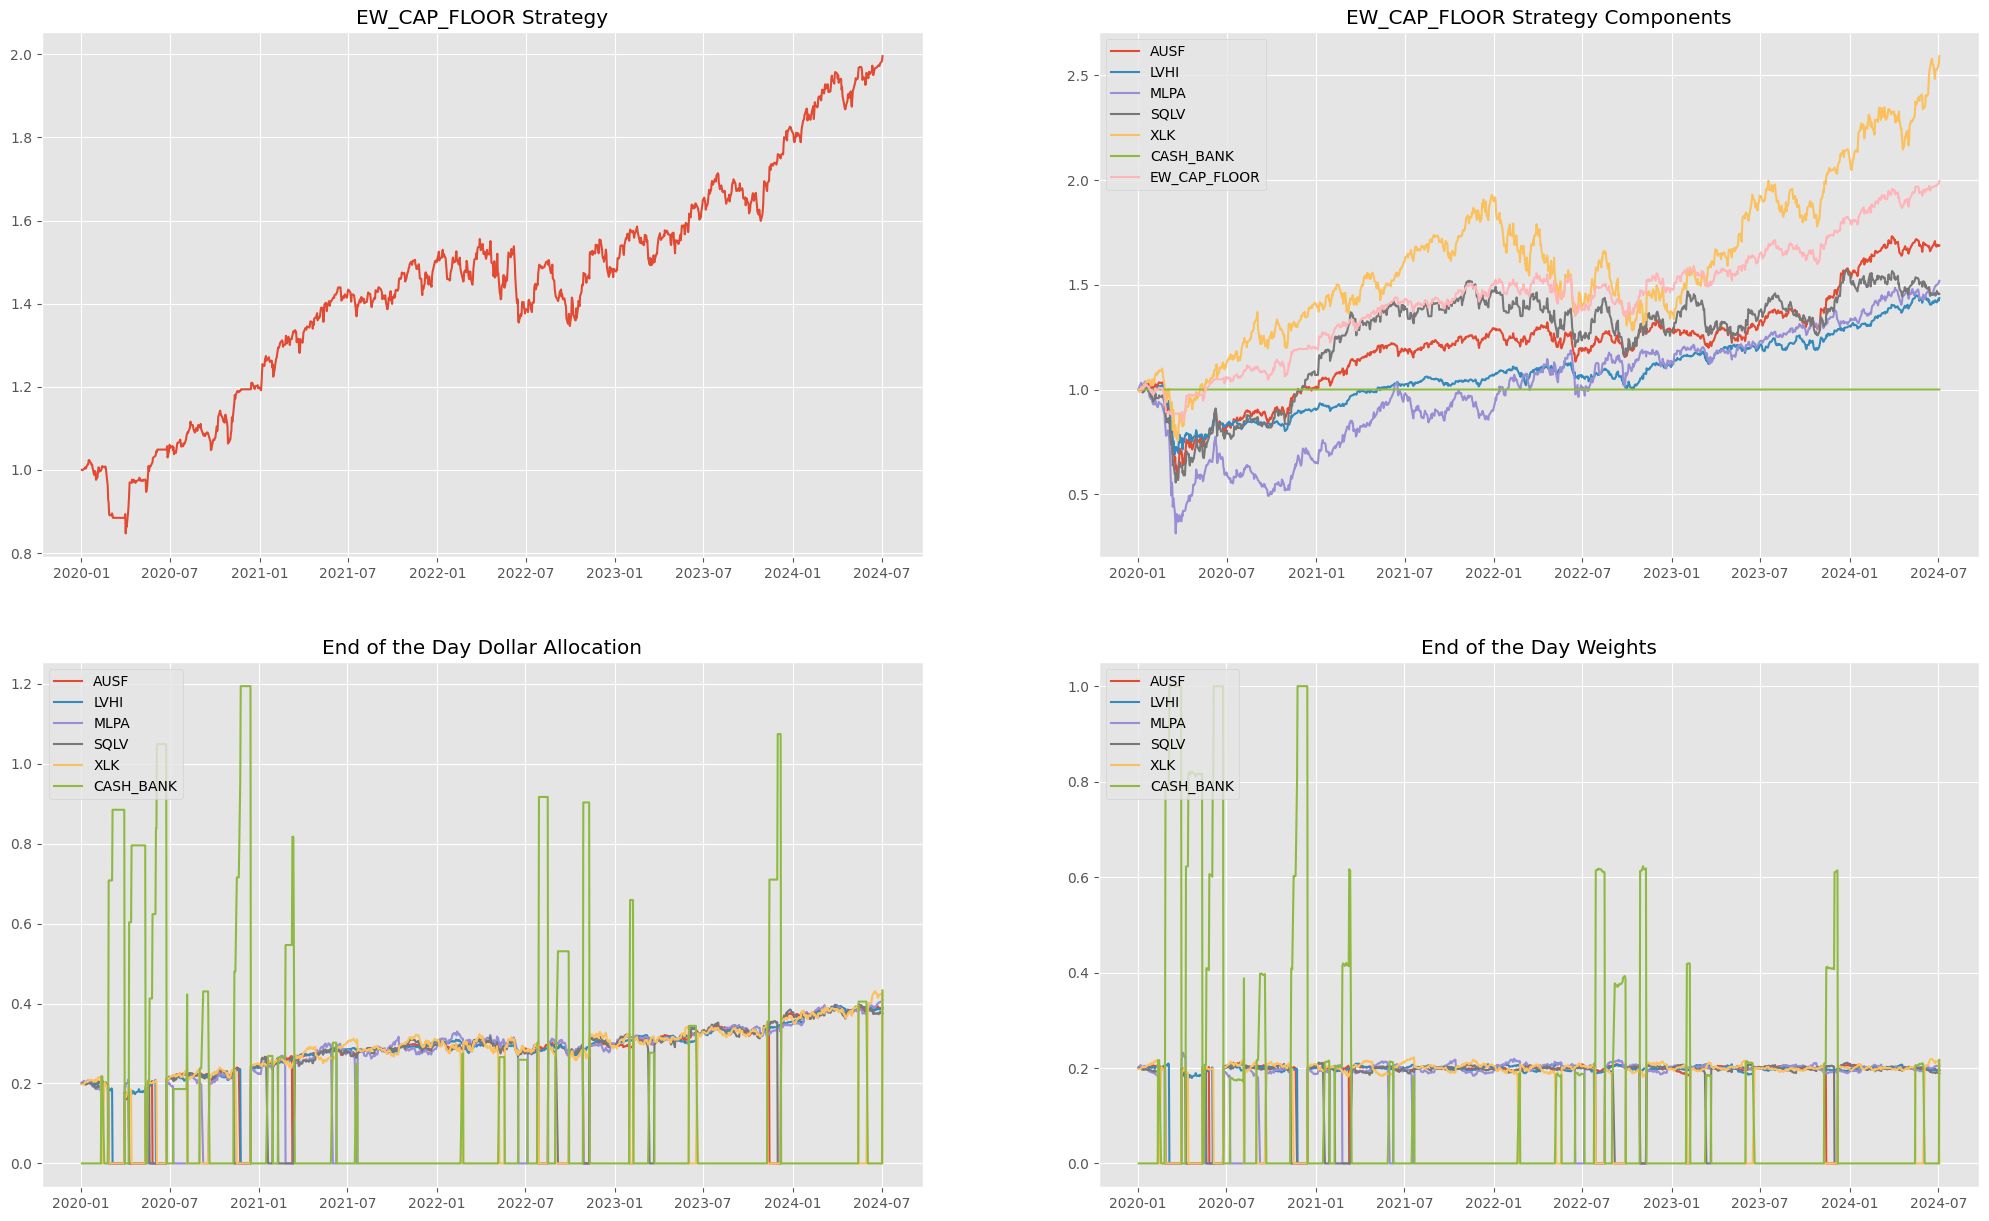

In [4]:
trigger_simulation = TriggerSimulation(returns, allocation_type='ew_cap_floor',safe_asset='cash_bank',
                                       threshold=[0.1,0.1], window=0, rebal = 30)
backtest_results = trigger_simulation.trigger_simulation()

### Dynamic Asset Allocation

In [5]:
m=3.0
start_value=float(1)
kappa=0.8
window=0
rebal = 1
w_bounds=[0,1]
are_returns = True
plot = True

In [6]:
daa = pd.concat([pd.DataFrame(returns['XLK']) , backtest_results['portfolio_value'].pct_change().dropna()], axis = 1)

Summary: 
 strategy: Relative Maximum Drawdown 
 m = 3.0 
 kappa: 0.8 
             rebalancing frequency: 1 
 weight bounds: [0, 1]
using RETURNS...
--- 4.8975913524627686 seconds ---


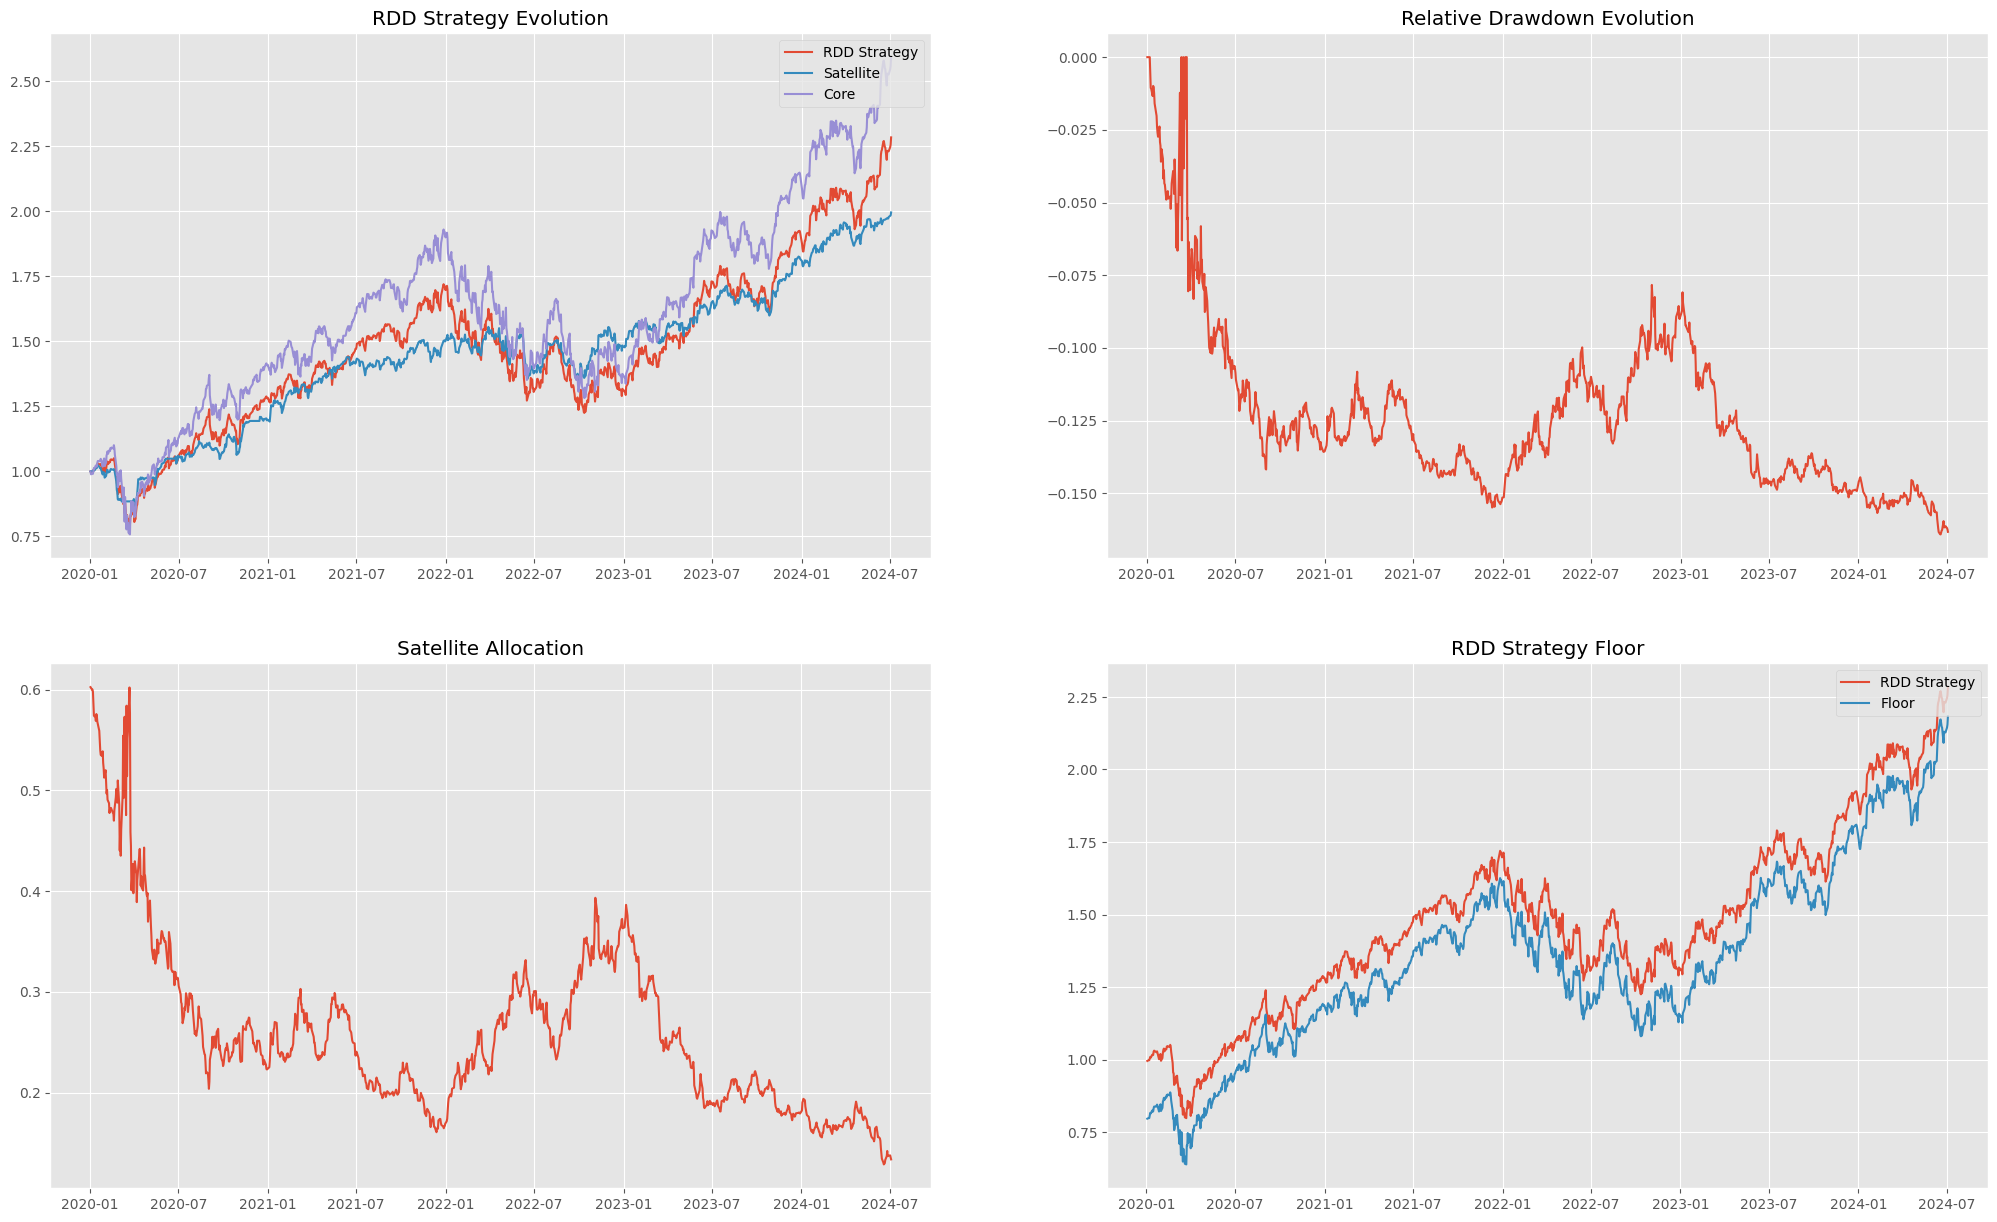

In [9]:
sat_core = False
strategy_type = 'rdd'
strategy_name = strategy_type + '_account'
daa_simulation = DAASimulation(daa, strategy_type, m, kappa, rebal,start_value, window,  sat_core, w_bounds, are_returns, plot)
backtest_result = daa_simulation.daa_simulation()  
results = returns.join(backtest_result['history'][strategy_name].pct_change().dropna(), on = 'Date')

In [10]:
results = performance_metrics(results, ALL_ABS_METRICS, round_to=5)

using RETURNS...
ratio_metric: estimating sharpe_ratio using target of 0.05
value_at_risk: VaR estimated using a cornish_fisher assumption and a confidence level of: 95.0%
ratio_metric: estimating c_f_var_ratio using target of 0.05
value_at_risk: VaR estimated using a cornish_fisher assumption and a confidence level of: 95.0%
value_at_risk: VaR estimated using a sample assumption and a confidence level of: 95.0%
ratio_metric: estimating sample_var_ratio using target of 0.05
value_at_risk: VaR estimated using a sample assumption and a confidence level of: 95.0%
ratio_metric: estimating cvar_ratio using target of 0.05
using RETURNS...
ratio_metric: estimating calmar_ratio using target of 0.05
using RETURNS...
using RETURNS...
ratio_metric: estimating sterling_ratio using target of 0.05
using RETURNS...
using RETURNS...
ratio_metric: estimating burke_ratio using target of 0.05
using RETURNS...
using RETURNS...
ratio_metric: estimating modified_burke_ratio using target of 0.05
using RETURN

,total_return,annualized_returns,annualized_volatility,sharpe_ratio,skewness,kurtosis,normal_test,value_at_risk,c_f_var_ratio,value_at_risk,...,sortino_ratio,kappa_risk_measure,kappa_ratio,gain_loss_ratio,upside_potential_ratio,omega_ratio_sum_approx,omega_ratio_put_option,sortino_ratio,kappa_ratio,sharpe_ratio
AUSF,0.68871,0.12372,0.22683,0.30955,-0.78310,18.70743,0.0,0.01969,3.56690,0.01723,...,0.69156,0.26497,0.26527,1.08910,0.04465,1.08910,1.09105,0.00367,0.00141,0.02605
LVHI,0.43714,0.08408,0.16543,0.19622,-1.83783,24.29118,0.0,0.01580,2.05418,0.01331,...,0.36531,0.24618,0.13202,1.06003,0.03596,1.06003,1.06177,0.00205,0.00074,0.01744
MLPA,0.51945,0.09760,0.36113,0.12553,-2.23262,38.92372,0.0,0.02983,1.51989,0.02402,...,0.34771,0.32583,0.13919,1.06989,0.05232,1.06989,1.07091,0.00342,0.00137,0.01963
SQLV,0.45682,0.08737,0.27556,0.12915,0.08884,6.69936,0.0,0.02422,1.46935,0.02552,...,0.32658,0.26537,0.13429,1.05318,0.05239,1.05318,1.05425,0.00265,0.00109,0.01667
XLK,1.59240,0.23622,0.28234,0.62825,-0.14869,7.64548,0.0,0.02517,7.04821,0.02560,...,1.60087,0.26849,0.66157,1.13751,0.06000,1.13751,1.13962,0.00728,0.00301,0.04535
cash_bank,0.00000,0.00000,0.00000,-inf,NaN,NaN,NaN,NaN,NaN,-0.00000,...,-54.33718,0.05785,-5.20019,0.00000,0.00000,0.00000,-251.02430,-0.22091,-0.02114,-inf
rdd_account,1.28395,0.20185,0.21880,0.66108,-0.23545,2.27649,0.0,0.02128,6.79814,0.02095,...,1.47593,0.24060,0.60251,1.13149,0.05516,1.13149,1.13393,0.00644,0.00263,0.04580


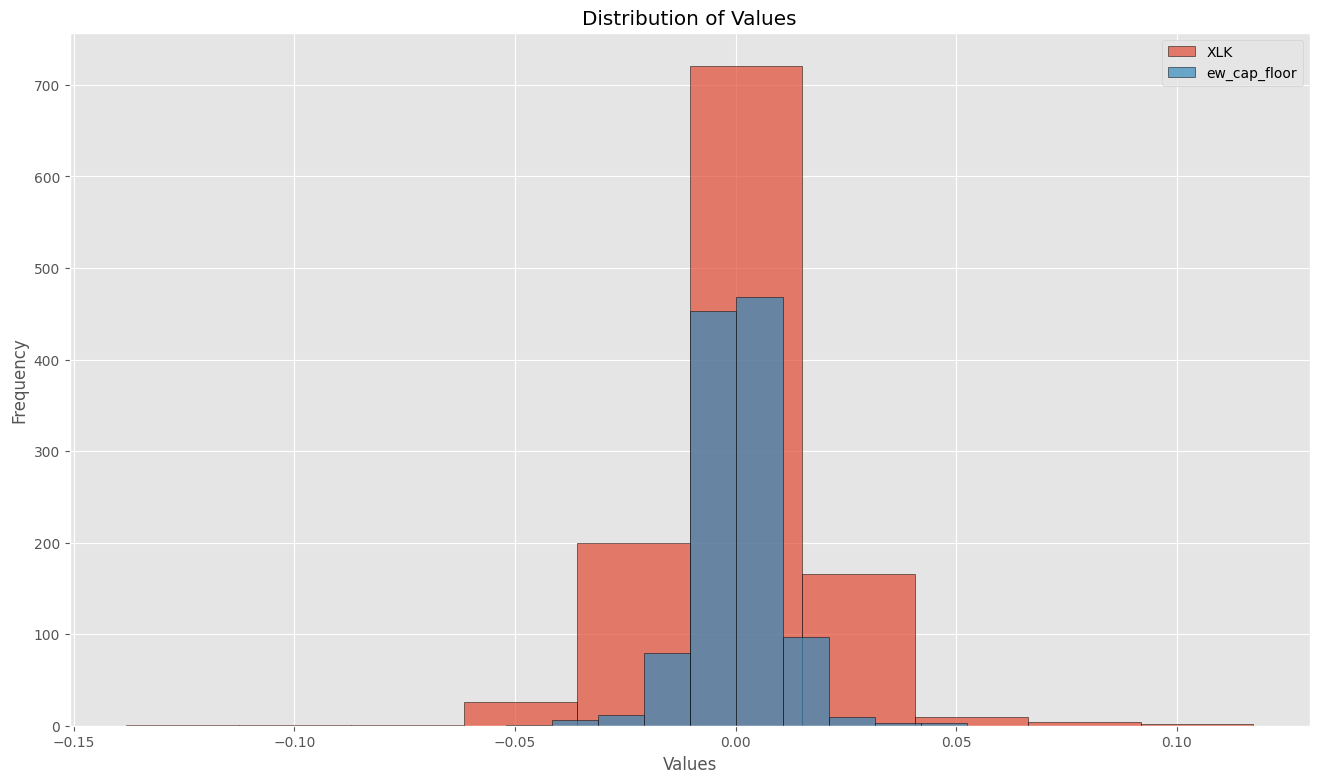

In [11]:
plot_distribution(daa,overlap=True)